# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

The aim of this project is to find a safe and secure location for opening of commercial establishments in Toronto Canada. Specifically, this report will be targeted to stakeholders interested in opening any business place like **Grocery Store** , **Restaurants** in **Toronto City**, Canada. In short safest place for any business activity.

Here we will take example of grocery store. The first task would be to **choose the safest borough** by analysing crime data for opening a grocery store and **short listing a neighbourhood**, where grocery stores are not amongst the most commom venues, and yet **as close to the city as possible**.

We will make use of our data science tools to analyse data and focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood where grocery store is not amongst the most common venue can be selected.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* Analyse the crime data and crime pattern in toronto on commercial properties
* finding the safest borough based on crime statistics
* finding the most common venues within the borough


We will be using the geographical coordinates of Toronto to plot neighbourhoods in a borough that is safe and in the city's vicinity, and finally cluster our neighborhoods and present our findings.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Using a real world data set from official Toronto police website containing the toronto Crimes from 2013 to 2019](#part1):  A dataset consisting of the crime statistics of each Neighbourhood in Toronto along with type of crime, recorded year, month and hour. But we will use data for 2019 year only.

- [**Part 2**: Gathering additional information of the list of officially categorized boroughs in Toronto from Wikipedia.](#part2): Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

- [**Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.](#part3): This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

- [**Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.](#part4): This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

### **Part 1:** Using a real world data set from toronto police official website containing the toronto Crimes from 2013 to 2019<a name="part1"></a>


####  Toronto Crime Report 

Properties of the Crime Report
*   PREMISE TYPE - Type of property where crime occurred - we will choose commercial 
*   OFFENCE- Crime type
*   YEAR - Recorded year - 2019 year will be filtered
*   MONTH - Recorded month
*   DAY - Recorded day
*   HOUR - Recorded hour
*   MINUTE - Recorded minute
*   Hood ID  - Neighbourhood id number
*   NEIGHBOURHOOD - Recorded neighborhood

Data set URL: https://data.torontopolice.on.ca/datasets/mci-2014-to-2019

### Importing all the necessary Libraries

In [1]:

import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.1.1
Libraries imported


### Reading from the Dataset

###### For this project we will be considering the recent crime report of the 2019.

In [2]:
tor_crime_df = pd.read_csv('MCI_2014_to_2019.csv', index_col=None)

tor_crime_df['occurrenceyear']= tor_crime_df['occurrenceyear'] == 2019
#Dropping the columns which are not required for our analysis

tor_crime_df.drop(['X','Y','Index_','MCI','event_unique_id','occurrenceyear','occurrencedate','reporteddate','ucr_code','ucr_ext','reportedyear','reportedmonth','reportedday','reporteddayofyear','reporteddayofweek','reportedhour','occurrencedayofyear','Division','Long','Lat','ObjectId'], axis = 1, inplace = True)



tor_crime_df['Neighbourhood'] = tor_crime_df.Neighbourhood.str.split('(').str[0]


print(tor_crime_df.shape)
tor_crime_df.head()


(206435, 8)


,premisetype,offence,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,Hood_ID,Neighbourhood
0,Commercial,Assault,March,24.0,Monday,1,132,Malvern
1,Other,B&E,September,27.0,Saturday,16,76,Bay Street Corridor
2,Commercial,B&E,March,24.0,Monday,6,1,West Humber-Clairville
3,Apartment,B&E,March,24.0,Monday,15,47,Don Valley Village
4,Commercial,Robbery - Business,May,3.0,Saturday,2,90,Junction Area


#### Changing the name of columns to shorten the names.

In [3]:
tor_crime_df.columns = ['Type', 'Offence','Month','Day','Week','Hour','HoodID','Neighbourhood']
tor_crime_df.head()

,Type,Offence,Month,Day,Week,Hour,HoodID,Neighbourhood
0,Commercial,Assault,March,24.0,Monday,1,132,Malvern
1,Other,B&E,September,27.0,Saturday,16,76,Bay Street Corridor
2,Commercial,B&E,March,24.0,Monday,6,1,West Humber-Clairville
3,Apartment,B&E,March,24.0,Monday,15,47,Don Valley Village
4,Commercial,Robbery - Business,May,3.0,Saturday,2,90,Junction Area


### Total Crimes in different Neighborhoods

In [4]:
tor_crime_df['Neighbourhood'].value_counts()


Waterfront Communities-The Island     7747
Bay Street Corridor                   6817
Church-Yonge Corridor                 6232
West Humber-Clairville                5702
Moss Park                             4786
                                      ... 
Yonge-St.Clair                         412
Guildwood                              411
Maple Leaf                             410
Woodbine-Lumsden                       377
Lambton Baby Point                     353
Name: Neighbourhood, Length: 140, dtype: int64

### **Part 2:** Gathering additional information about the Neighborhood from Wikipedia<a name="part2"></a>

#### As part of data set Borough which the neighborhood was part of was not categorized, so we will create a dictionary of Neighborhood and based on data in the following [Wikipedia page](https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto).

### Installing beautiful soup package and XML parser for web scrapping

In [6]:
conda install -c anaconda beautifulsoup4

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |           py36_0         168 KB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     anaconda/linux-64::beautifulsoup4-4.9.1-py36_0
  soupsieve          anaconda/noarch::soupsieve-2.0.1-py_0

The following packag

In [7]:
conda install -c anaconda lxml

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h7d1a2b0_0         577 KB  anaconda
    lxml-4.5.1                 |   py36hefd8a0e_0         1.4 MB  anaconda
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  libxslt            anaconda/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               anaconda/linux-64::lxml-4.5.1-py36hefd8a0e_0



lxml-4.5.1           | 1.4 MB    | ##################################### | 100% 
libxslt-1.1.33       | 577 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

N

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
url="https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of city-designated neighbourhoods in Toronto - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bac2fdf6-0ed4-4dae-94ae-6cb72a432734","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_city-designated_neighbourhoods_in_Toronto","wgTitle":"List of city-designated neighbourhoods in Toronto","wgCurRevisionId":964711822,"wgRevisionId":964711822,"wgArticleId":38958245,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles to be merged from June 2020","All

In [10]:
# table extraction from wikipage
table = soup.find("table", {"class" : "wikitable sortable"})
df = pd.read_html(str(table))[0]
df.drop(df.columns[[1,3,4,5]], axis = 1, inplace = True)
df.columns = ['HoodID','Borough']
df


,HoodID,Borough
0,129,Scarborough
1,128,Scarborough
2,20,Etobicoke
3,95,Old City of Toronto
4,42,North York
...,...,...
135,94,Old City of Toronto
136,100,Old City of Toronto
137,97,Old City of Toronto
138,27,North York


#### Dropping NaN values and 
#### Merge the two tables with Hood ID as key column to add borough column


In [17]:
tor_crime_df.dropna
tor_crime_df.head()

,Type,Offence,Month,Day,Week,Hour,HoodID,Neighbourhood
0,Commercial,Assault,March,24.0,Monday,1,132,Malvern
1,Other,B&E,September,27.0,Saturday,16,76,Bay Street Corridor
2,Commercial,B&E,March,24.0,Monday,6,1,West Humber-Clairville
3,Apartment,B&E,March,24.0,Monday,15,47,Don Valley Village
4,Commercial,Robbery - Business,May,3.0,Saturday,2,90,Junction Area


In [13]:
df_merged = df.merge(tor_crime_df)

In [14]:
df_merged.head(10)


,HoodID,Borough,Type,Offence,Month,Day,Week,Hour,Neighbourhood
0,129,Scarborough,House,B&E,April,26.0,Saturday,16,Agincourt North
1,129,Scarborough,Outside,Robbery - Other,March,7.0,Friday,22,Agincourt North
2,129,Scarborough,Outside,Robbery With Weapon,January,24.0,Friday,20,Agincourt North
3,129,Scarborough,Other,Assault,February,26.0,Wednesday,14,Agincourt North
4,129,Scarborough,House,B&E,January,10.0,Friday,13,Agincourt North
5,129,Scarborough,House,B&E,February,7.0,Friday,15,Agincourt North
6,129,Scarborough,Commercial,B&E W'Intent,December,11.0,Thursday,0,Agincourt North
7,129,Scarborough,House,B&E,September,26.0,Friday,11,Agincourt North
8,129,Scarborough,House,Assault,September,7.0,Sunday,5,Agincourt North
9,129,Scarborough,Outside,Robbery - Swarming,August,5.0,Tuesday,19,Agincourt North


### Offence count by Borough

In [18]:
df_merged.dropna(inplace=True)
df_merged['Borough'].value_counts()

Old City of Toronto    75255
North York             45007
Scarborough            44168
Etobicoke              26076
York                    9709
East York               6161
Name: Borough, dtype: int64

### Offence count by hour of the day when it occurred


In [19]:
tor_hour = df_merged.groupby(['Hour']).count()['Offence']
tor_hour

Hour
0     13594
1      8729
2      8828
3      6766
4      5030
5      3807
6      3441
7      4350
8      6225
9      7143
10     7165
11     7487
12    11577
13     8210
14     8674
15    10132
16     9760
17    10357
18    11056
19    10560
20    10868
21    11114
22    10881
23    10622
Name: Offence, dtype: int64

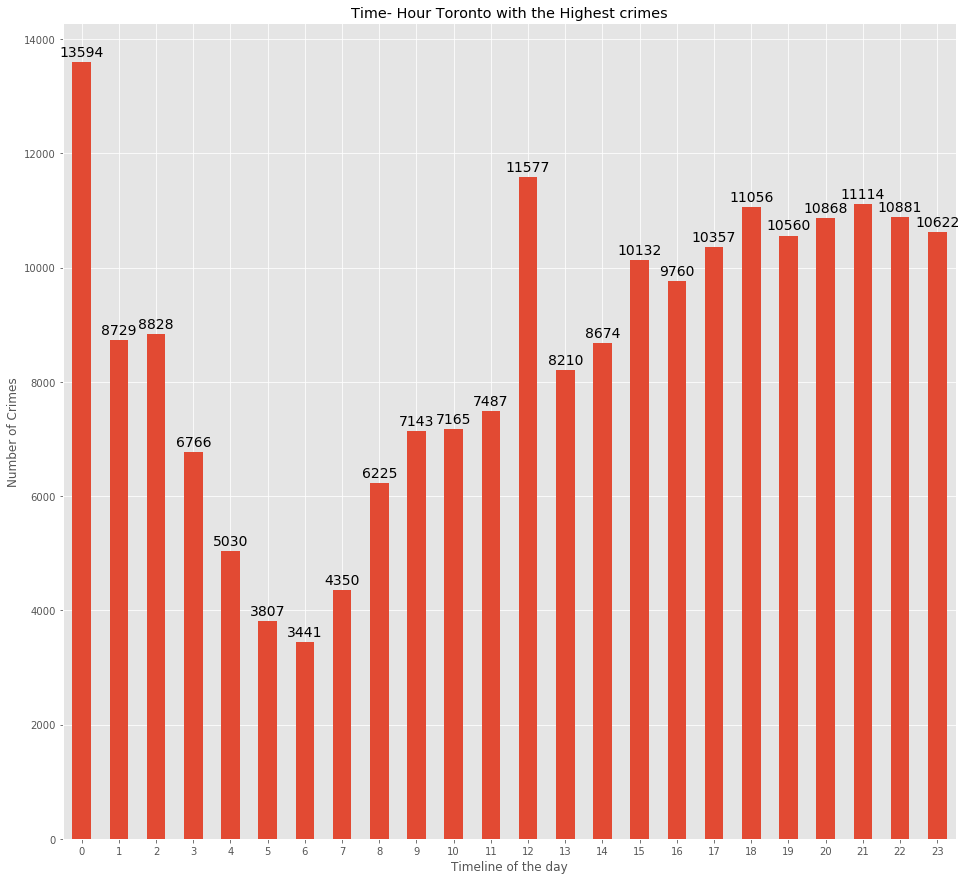

In [20]:
ax = tor_hour.plot(kind='bar', figsize=(16, 15), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Timeline of the day')
ax.set_title('Time- Hour Toronto with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### It can be concluded from graph that most of the offence occurs around midnight or late night hours of the day. It lowers during day while gradually increases and peaks at midnight. 

In [21]:
tor_week = df_merged.groupby(['Week']).count()['Offence'].sort_values(ascending = False)
tor_week

Week
Friday        31387
Saturday      30781
Sunday        29718
Thursday      28885
Monday        28806
Wednesday     28654
Tuesday       28145
Name: Offence, dtype: int64

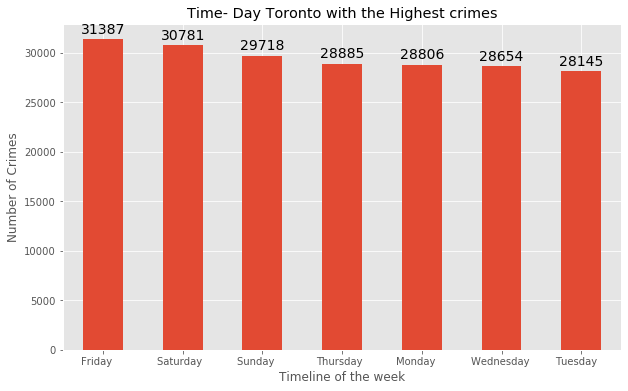

In [22]:
ax = tor_week.plot(kind='bar', figsize=(10,6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Timeline of the week')
ax.set_title('Time- Day Toronto with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

#### The count of offence if seen day wise then it remains almost constant throughout the weekdays but increases during weekends.

##Methodology<a name="methodology"></a>

Categorized the methodologysection into two parts:

- [**Exploratory Data Analysis**:](#eda) Visualise the crime reports in different Toronto boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.


- [**Modelling**:](#mdl) To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

#### Exploratory Data Analysis<a name="eda"></a>

#### Using group by clause to see which Borough has the most offence on commercial properties

In [23]:
tor_crime = df_merged.groupby(['Borough','Type']).count()['Offence']
tor_crime

Borough              Type      
East York            Apartment      2211
                     Commercial      904
                     House          1185
                     Other           557
                     Outside        1304
Etobicoke            Apartment      5477
                     Commercial     4873
                     House          5603
                     Other          2912
                     Outside        7211
North York           Apartment     11493
                     Commercial     7180
                     House         10430
                     Other          4612
                     Outside       11292
Old City of Toronto  Apartment     17912
                     Commercial    18422
                     House          7565
                     Other          9332
                     Outside       22024
Scarborough          Apartment      9999
                     Commercial     8244
                     House         11301
                     Othe

#####Merging the Pivoted Column with other columns

In [24]:
df_tor_com = df_merged[df_merged['Type'] == 'Commercial']
df_merged_neigh = pd.pivot_table(df_tor_com,
                               values=['Type'],
                               index=['Neighbourhood'],
                               columns=['Offence'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
df_merged_neigh

Type                     \
Offence                       Administering Noxious Thing Aggravated Assault   
Neighbourhood                                                                  
Agincourt North                                         0                  0   
Agincourt South-Malvern West                            0                  3   
Alderwood                                               0                  0   
Annex                                                  26                  1   
Banbury-Don Mills                                       0                  0   
...                                                   ...                ...   
Yonge-Eglinton                                          1                  1   
Yonge-St.Clair                                          0                  0   
York University Heights                                 0                 16   
Yorkdale-Glen Park                                      2                  3   
All                                                    99                291   

                                                                      \
Offence                       Aggravated Assault Avails Pros Assault   
Neighbourhood                                                          
Agincourt North                                            0      50   
Agincourt South-Malvern West                               0     128   
Alderwood                                                  0      19   
Annex                                                      0     213   
Banbury-Don Mills                                          0      44   
...                                                      ...     ...   
Yonge-Eglinton                                             0      66   
Yonge-St.Clair                                             0      18   
York University Heights                                    1     245   
Yorkdale-Glen Park                                         0     194   
All                                                        5   11077   

                                                           \
Offence                       Assault - Force/Thrt/Impede   
Neighbourhood                                               
Agincourt North                                         0   
Agincourt South-Malvern West                            0   
Alderwood                                               1   
Annex                                                   1   
Banbury-Don Mills                                       0   
...                                                   ...   
Yonge-Eglinton                                          0   
Yonge-St.Clair                                          0   
York University Heights                                 2   
Yorkdale-Glen Park                                      0   
All                                                    34   

                                                              \
Offence                       Assault - Resist/ Prevent Seiz   
Neighbourhood                                                  
Agincourt North                                            2   
Agincourt South-Malvern West                               9   
Alderwood                                                  0   
Annex                                                     22   
Banbury-Don Mills                                          4   
...                                                      ...   
Yonge-Eglinton                                             6   
Yonge-St.Clair                                             0   
York University Heights                                   12   
Yorkdale-Glen Park                                        43   
All                                                     1422   

                                                                         \
Offence                       Assault Bodily Harm Assault Peace Officer   
Neighbourhood        

In [25]:
df_merged_neigh.reset_index(inplace = True)
df_merged_neigh.columns = df_merged_neigh.columns.map(''.join)
df_merged_neigh.rename(columns={'TypeAll':'Total'}, inplace=True)
# To ignore bottom All in Borough
#df_merged_neigh = df_merged_neigh.head(4)
df_merged_neigh.columns = [col.replace('Type', '') for col in df_merged_neigh.columns]
df_merged_neigh

,Neighbourhood,Administering Noxious Thing,Aggravated Assault,Aggravated Assault Avails Pros,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,...,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off,Total
0,Agincourt North,0,0,0,50,0,2,6,1,0,...,1,10,4,0,0,0,0,0,0,159
1,Agincourt South-Malvern West,0,3,0,128,0,9,11,1,0,...,10,45,19,1,0,2,0,0,0,541
2,Alderwood,0,0,0,19,1,0,3,0,0,...,3,14,20,0,0,0,0,0,0,150
3,Annex,26,1,0,213,1,22,16,8,0,...,1,23,60,0,0,28,0,0,0,884
4,Banbury-Don Mills,0,0,0,44,0,4,4,0,0,...,0,18,27,0,2,1,0,0,0,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Yonge-Eglinton,1,1,0,66,0,6,4,1,0,...,0,2,5,0,0,2,0,0,1,201
137,Yonge-St.Clair,0,0,0,18,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,76
138,York University Heights,0,16,1,245,2,12,25,10,0,...,11,136,66,0,0,8,0,0,0,1123
139,Yorkdale-Glen Park,2,3,0,194,0,43,10,7,1,...,7,76,53,0,1,30,0,0,1,755


#### Finding out the top 5 neighbourhood with highest offence count

In [26]:
df_merged_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )
crime_neigh_top5 = df_merged_neigh.iloc[1:6]
crime_neigh_top5

,Neighbourhood,Administering Noxious Thing,Aggravated Assault,Aggravated Assault Avails Pros,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,...,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off,Total
6,Bay Street Corridor,5,24,0,1102,1,218,76,69,6,...,4,35,125,1,1,58,1,1,0,2905
122,Waterfront Communities-The Island,10,26,3,1000,4,71,152,65,2,...,3,46,110,3,1,11,0,1,0,2590
23,Church-Yonge Corridor,8,6,0,610,1,99,41,28,0,...,1,21,56,1,0,8,0,1,3,1786
124,West Humber-Clairville,2,8,0,311,1,23,24,11,0,...,23,359,124,0,1,6,0,1,1,1669
138,York University Heights,0,16,1,245,2,12,25,10,0,...,11,136,66,0,0,8,0,0,0,1123


#### Pivoting the table to better understand the data by crimes per Borough

In [27]:
df_tor_com = df_merged[df_merged['Type'] == 'Commercial']
df_merged_borough = pd.pivot_table(df_tor_com,
                               values=['Type'],
                               index=['Borough'],
                               columns=['Offence'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
df_merged_borough

Type                     \
Offence             Administering Noxious Thing Aggravated Assault   
Borough                                                              
East York                                     0                  5   
Etobicoke                                     5                 23   
North York                                   11                 65   
Old City of Toronto                          68                113   
Scarborough                                  14                 72   
York                                          1                 13   
All                                          99                291   

                                                            \
Offence             Aggravated Assault Avails Pros Assault   
Borough                                                      
East York                                        0     210   
Etobicoke                                        0     944   
North York                                       2    1927   
Old City of Toronto                              3    5642   
Scarborough                                      0    2055   
York                                             0     299   
All                                              5   11077   

                                                 \
Offence             Assault - Force/Thrt/Impede   
Borough                                           
East York                                     2   
Etobicoke                                     2   
North York                                    7   
Old City of Toronto                          14   
Scarborough                                   5   
York                                          4   
All                                          34   

                                                                        \
Offence             Assault - Resist/ Prevent Seiz Assault Bodily Harm   
Borough                                                                  
East York                                       35                  15   
Etobicoke                                      125                  66   
North York                                     195                 153   
Old City of Toronto                            765                 532   
Scarborough                                    267                 149   
York                                            35                  25   
All                                           1422                 940   

                                                                         \
Offence             Assault Peace Officer Assault Peace Officer Wpn/Cbh   
Borough                                                                   
East York                               8                             0   
Etobicoke                              25                             0   
North York                             57                             2   
Old City of Toronto                   312                            16   
Scarborough                            91                             5   
York                                    9                             2   
All                                   502                            25   

                                         ...                                \
Offence             Assault With Weapon  ... Theft From Motor Vehicle Over   
Borough                                  ...                                 
East York                            62  ...                             2   
Etobicoke                           204  ...                            48   
North York                          515  ...                            37   
Old City of Toronto                1342  ...                            21   
Scarborough                         618  ...                            57   
York                                110  ...                             2   
All             

In [28]:
df_merged_borough.reset_index(inplace = True)
df_merged_borough.columns = df_merged_borough.columns.map(''.join)
df_merged_borough.rename(columns={'TypeAll':'Total'}, inplace=True)
# To ignore bottom All in Borough
df_merged_borough.columns = [col.replace('Type', '') for col in df_merged_borough.columns]
df_merged_borough

,Borough,Administering Noxious Thing,Aggravated Assault,Aggravated Assault Avails Pros,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,...,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off,Total
0,East York,0,5,0,210,2,35,15,8,0,...,2,25,38,0,0,8,0,3,0,904
1,Etobicoke,5,23,0,944,2,125,66,25,0,...,48,631,299,1,3,57,0,3,5,4873
2,North York,11,65,2,1927,7,195,153,57,2,...,37,590,428,1,12,75,0,0,5,7180
3,Old City of Toronto,68,113,3,5642,14,765,532,312,16,...,21,382,646,8,6,173,1,8,11,18422
4,Scarborough,14,72,0,2055,5,267,149,91,5,...,57,663,219,1,2,45,0,3,5,8244
5,York,1,13,0,299,4,35,25,9,2,...,2,83,46,0,0,5,0,0,0,1455
6,All,99,291,5,11077,34,1422,940,502,25,...,167,2374,1676,11,23,363,1,17,26,41078


In [29]:
df_merged_borough.sort_values(['Total'], ascending = False, axis = 0, inplace = True )
crime_borough = df_merged_borough.iloc[1:7]
crime_borough

,Borough,Administering Noxious Thing,Aggravated Assault,Aggravated Assault Avails Pros,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,...,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off,Total
3,Old City of Toronto,68,113,3,5642,14,765,532,312,16,...,21,382,646,8,6,173,1,8,11,18422
4,Scarborough,14,72,0,2055,5,267,149,91,5,...,57,663,219,1,2,45,0,3,5,8244
2,North York,11,65,2,1927,7,195,153,57,2,...,37,590,428,1,12,75,0,0,5,7180
1,Etobicoke,5,23,0,944,2,125,66,25,0,...,48,631,299,1,3,57,0,3,5,4873
5,York,1,13,0,299,4,35,25,9,2,...,2,83,46,0,0,5,0,0,0,1455
0,East York,0,5,0,210,2,35,15,8,0,...,2,25,38,0,0,8,0,3,0,904


#### Expolring the data by Visualising

##### Five Neighborhoods with highest crime

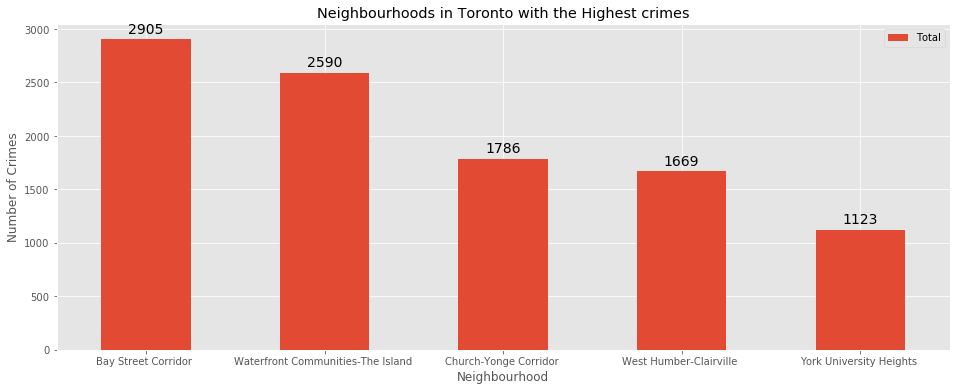

In [30]:
per_neigh = crime_neigh_top5[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(16, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

##### Five Neighborhoods with lowest crime

In [31]:
crime_neigh_low = df_merged_neigh.tail(5)
crime_neigh_low

,Neighbourhood,Administering Noxious Thing,Aggravated Assault,Aggravated Assault Avails Pros,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,...,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off,Total
8,Bayview Woods-Steeles,0,0,0,3,0,1,0,0,0,...,0,2,2,0,0,0,0,0,0,24
66,Lambton Baby Point,0,0,0,3,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,23
74,Maple Leaf,0,0,0,4,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,23
16,Bridle Path-Sunnybrook-York Mills,0,1,0,6,0,0,0,1,0,...,0,0,3,0,0,0,0,0,0,22
134,Woodbine-Lumsden,0,0,0,4,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,20


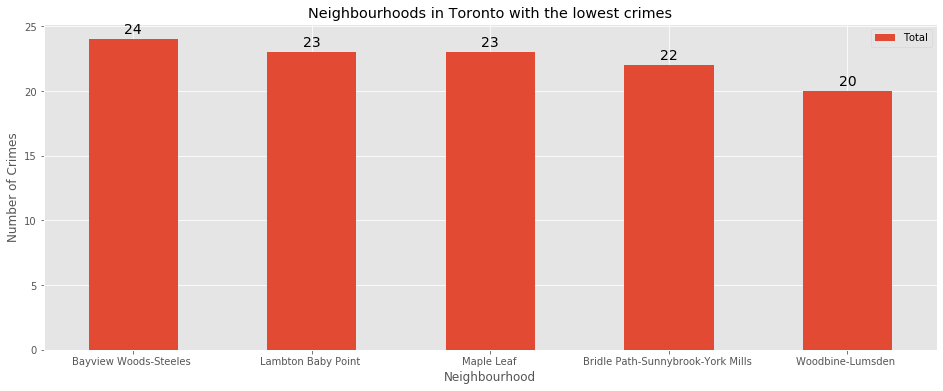

In [32]:
per_neigh = crime_neigh_low[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(16, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

#### Borough in Toronto with Highest Crime

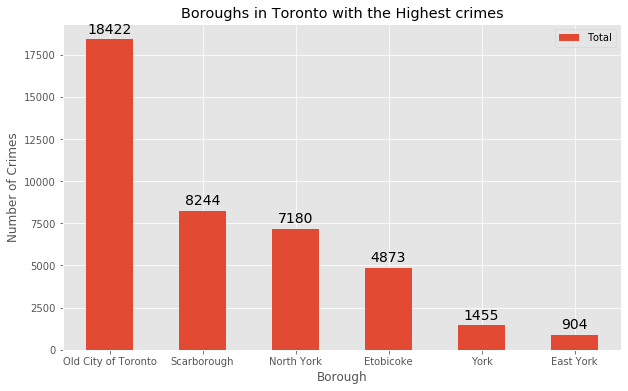

In [33]:
per_borough = crime_borough[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Boroughs in Toronto with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Based on exploratory data analysis it is clear that **East York** has the lowest crimes

### Since East York has very little number of neighborhoods , we will see if  opening a commercial establishment is viable or not, otherwise we can choose the next borough with lowest crime which is **York**.
### First lets study what kind of offences occur in two of these boroughs

In [34]:
eastyork_df = crime_borough[crime_borough['Borough'] == 'East York']
df_eastyork  = eastyork_df.T
df_eastyork = df_eastyork.iloc[1:43]
df_eastyork.columns= ['Count']
df_eastyork.sort_values(['Count'], ascending = False, axis = 0, inplace = True )
df_eastyork = df_eastyork.head(10)
df_eastyork

,Count
B&E,302
Assault,210
Robbery - Business,74
Assault With Weapon,62
B&E W'Intent,52
Theft Over,38
Assault - Resist/ Prevent Seiz,35
Theft Of Motor Vehicle,25
Robbery With Weapon,16
Assault Bodily Harm,15


#### Different types of crimes recorded in the East York Borough



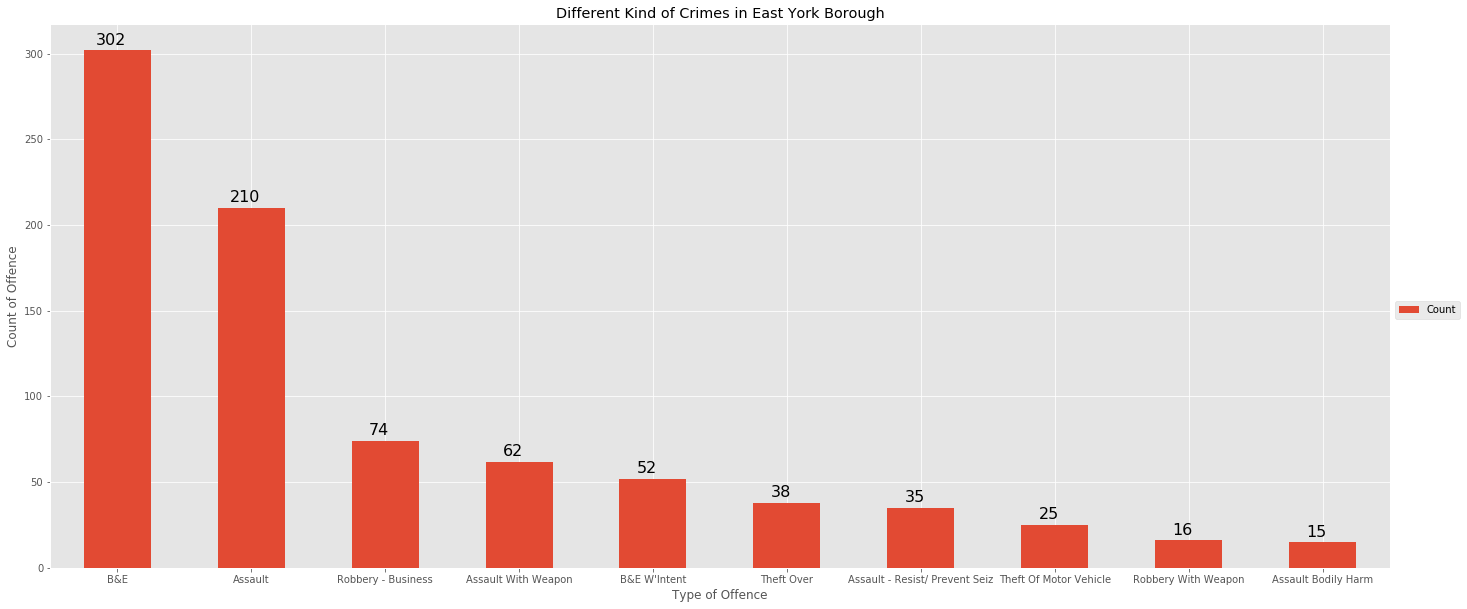

In [35]:
#tor_eastyork_df.set_index('Borough',inplace = True)
ax = df_eastyork.plot(kind='bar', figsize=(24, 10), rot=0)
ax.set_ylabel('Count of Offence')
ax.set_xlabel('Type of Offence')
ax.set_title('Different Kind of Crimes in East York Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 16
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

In [37]:
york_df = crime_borough[crime_borough['Borough'] == 'York']
df_york  = york_df.T
df_york = df_york.iloc[1:43]
df_york.columns= ['Count']
df_york.sort_values(['Count'], ascending = False, axis = 0, inplace = True )
df_york = df_york.head(10)
df_york

,Count
B&E,362
Assault,299
Robbery - Business,168
Assault With Weapon,110
B&E W'Intent,88
Theft Of Motor Vehicle,83
Robbery - Financial Institute,48
Theft Over,46
Robbery With Weapon,45
Assault - Resist/ Prevent Seiz,35


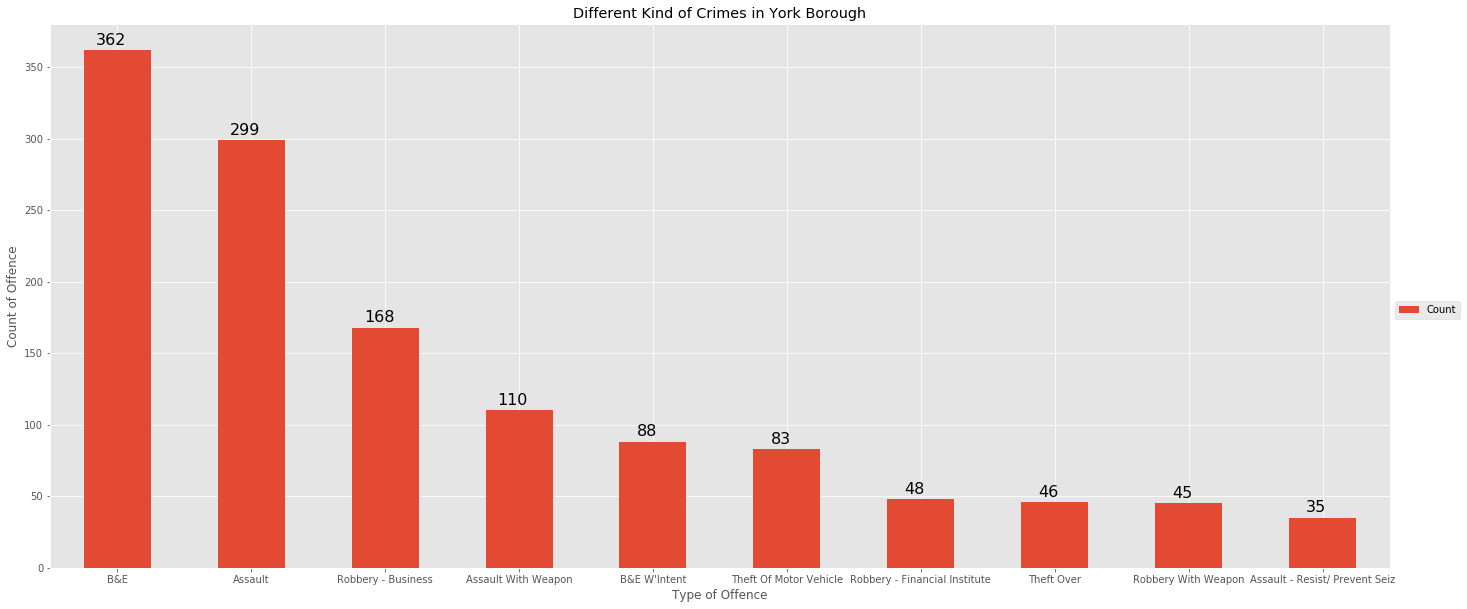

In [38]:
ax = df_york.plot(kind='bar', figsize=(24, 10), rot=0)
ax.set_ylabel('Count of Offence')
ax.set_xlabel('Type of Offence')
ax.set_title('Different Kind of Crimes in York Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 16
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

## We will choose York Borough since it has crime rate almost similar to East York. As York has more nieghbourhoods we will have more options for location of our business

### **Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.<a name="part3"></a>: 

#### This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

##### Restricting the rows in the data frame to only those with York as Borough

In [39]:
tor_borough = df_merged

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
tor_borough = tor_borough[tor_borough['Borough'] == 'York']
tor_borough.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in York Borough', len(tor_borough['Neighbourhood'].unique()))

tor_borough['Neighbourhood'].unique()

Number of Neighbourhoods in York Borough 10


array(['Beechborough-Greenbrook ', 'Briar Hill-Belgravia ',
       'Caledonia-Fairbank ', 'Humewood-Cedarvale ',
       'Keelesdale-Eglinton West ', 'Lambton Baby Point ',
       'Mount Dennis ', 'Oakwood Village ', 'Rockcliffe-Smythe ',
       'Weston '], dtype=object)

##### Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

In [40]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = tor_borough['Neighbourhood'].unique()



key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Toronto, ON, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('York')
print(Latitude, Longitude)

#print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

[43.70011, 43.70011, 43.6984164, 43.70011, 43.6901578, 43.70011, 43.6869597, 43.6827255, 43.70011, 43.7001608] [-79.4163, -79.4163, -79.4634801, -79.4163, -79.4749985, -79.4163, -79.4895513, -79.4380548, -79.4163, -79.5162474]


#### Glimpse of the new Data Frame with Neighborhoods in York Borough of Toronto along with centroid of their co-ordinates

In [41]:
ws_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ws_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Beechborough-Greenbrook,York,43.700110,-79.416300
1,Briar Hill-Belgravia,York,43.700110,-79.416300
2,Caledonia-Fairbank,York,43.698416,-79.463480
3,Humewood-Cedarvale,York,43.700110,-79.416300
4,Keelesdale-Eglinton West,York,43.690158,-79.474998
5,Lambton Baby Point,York,43.700110,-79.416300
6,Mount Dennis,York,43.686960,-79.489551
7,Oakwood Village,York,43.682725,-79.438055
8,Rockcliffe-Smythe,York,43.700110,-79.416300
9,Weston,York,43.700161,-79.516247


#### Fetching the Geographical co-ordiantes of Toronto to plot on Map

In [42]:
address = 'Toronto, ON, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Toronto,Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto,Canada are 43.6534817, -79.3839347.


#### Using Folium to plot Toronto City's York Borough and it's Neighborhoods

In [43]:
Tor_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Tor_map)  
    
Tor_map

#### Preparing crime data of York Borough onto the Toronto Map
#### Using Folium to plot Crime incidents on Toronto City's York Borough and it's Neighborhoods

In [44]:
tor_crime_map = pd.read_csv('MCI_2014_to_2019.csv', index_col=None)

tor_crime_map['occurrenceyear']= tor_crime_map['occurrenceyear'] == 2019
#Dropping X,Y which represents Lat, Lng data as Coordinates, the data seems to be corrupt

tor_crime_map.drop(['X','Y','Index_','MCI','event_unique_id','occurrenceyear','occurrencedate','reporteddate','ucr_code','ucr_ext','reportedyear','reportedmonth','reportedday','reporteddayofyear','reporteddayofweek','reportedhour','occurrencedayofyear','Division','ObjectId'], axis = 1, inplace = True)

tor_crime_map['Neighbourhood'] = tor_crime_df.Neighbourhood.str.split('(').str[0]

tor_crime_map.columns = ['Type', 'Offence','Month','Day','Week','Hour','HoodID','Neighbourhood','Long','Lat']
tor_crime_map.head()

tor_crime_map_merged = df.merge(tor_crime_map)
tor_crime_map_merged = tor_crime_map_merged[tor_crime_map_merged['Type'] == 'Commercial']
tor_crime_map_merged = tor_crime_map_merged[tor_crime_map_merged['Borough'] == 'York']
tor_crime_map_merged 

,HoodID,Borough,Type,Offence,Month,Day,Week,Hour,Neighbourhood,Long,Lat
17724,112,York,Commercial,B&E,May,5.0,Monday,16,Beechborough-Greenbrook,-79.467697,43.691719
17725,112,York,Commercial,Robbery - Purse Snatch,June,3.0,Tuesday,19,Beechborough-Greenbrook,-79.486107,43.694614
17726,112,York,Commercial,Robbery - Purse Snatch,June,3.0,Tuesday,19,Beechborough-Greenbrook,-79.486107,43.694614
17736,112,York,Commercial,B&E,December,18.0,Thursday,11,Beechborough-Greenbrook,-79.486221,43.693306
17750,112,York,Commercial,B&E,December,15.0,Tuesday,23,Beechborough-Greenbrook,-79.475456,43.697239
...,...,...,...,...,...,...,...,...,...,...,...
185779,113,York,Commercial,B&E,April,6.0,Saturday,0,Weston,-79.505112,43.707554
185803,113,York,Commercial,Theft Of Motor Vehicle,August,8.0,Wednesday,3,Weston,-79.505569,43.709248
185810,113,York,Commercial,Theft Of Motor Vehicle,May,13.0,Sunday,10,Weston,-79.525864,43.703224
185862,113,York,Commercial,Theft Of Motor Vehicle,September,11.0,Wednesday,22,Weston,-79.515877,43.698837


In [45]:
crime_map = folium.map.FeatureGroup()

# loop through all the rows and add each to the incidents feature group
for lat, lng, in zip(tor_crime_map_merged.Lat, tor_crime_map_merged.Long):
    crime_map.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )


    
# add incidents to map
Tor_map.add_child(crime_map)

In [216]:
crime_map.save('Crime_tor_map.png')

#### Choropleth Map of Toronto City to compare crime rate of all the Neighbourhoods

In [46]:
tor_choro_crime = df_merged.groupby('HoodID',).count()['Offence']

tor_choro_crime1 = pd.DataFrame(data=tor_choro_crime.values, index = tor_choro_crime.index, columns=['Count'])

# Resetting the index
tor_choro_crime1 = tor_choro_crime1.reset_index()

# Assignming the column names
tor_choro_crime1.rename({'index': 'HoodID'}, axis='columns', inplace=True)
tor_choro_crime1


,HoodID,Count
0,1,5701
1,2,2591
2,3,692
3,4,810
4,5,593
...,...,...
135,136,3496
136,137,3798
137,138,1862
138,139,1528


In [47]:
import folium
geojson = r'neighbourhoods_toronto.geojson'
# Create the map centering Toronto
tor_choro_map = folium.Map(location = [43.6534817, -79.3839347], zoom_start = 12)  

tor_choro_map.choropleth(geo_data=geojson,
                  data=tor_choro_crime1,
                  columns=['HoodID', 'Count'],
                  key_on='feature.properties.hoodnum',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Crime Rate in Toronto'
)

tor_choro_map



### **Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.<a name="part4"></a>: 
##### This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Setting Up Foursquare Credentials

In [49]:
#Four Square Credentials

CLIENT_ID = 'O1OR2QAGMXIXUZSUAMBLKB1HKJ1T04Y1MHHT1SPIH4TJS11Q' # your Foursquare ID
CLIENT_SECRET = 'C34V0W2VYNGXO5RE0E0J11GDTXOBM5A14FA1EO4GQST3PTQT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: O1OR2QAGMXIXUZSUAMBLKB1HKJ1T04Y1MHHT1SPIH4TJS11Q
CLIENT_SECRET:C34V0W2VYNGXO5RE0E0J11GDTXOBM5A14FA1EO4GQST3PTQT


#### Defining a function to fetch top 10 venues around a given neighborhood

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

#### Generating Venues

In [51]:
tor_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighbourhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude']
                                  )

Beechborough-Greenbrook 
Briar Hill-Belgravia 
Caledonia-Fairbank 
Humewood-Cedarvale 
Keelesdale-Eglinton West 
Lambton Baby Point 
Mount Dennis 
Oakwood Village 
Rockcliffe-Smythe 
Weston 


#### Data frame containing venues for each neighborhood in York Borough

In [52]:
print(tor_ws_venues.shape)
tor_ws_venues.head()

(126, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Beechborough-Greenbrook,43.70011,-79.4163,Hotel Gelato,Café
1,Beechborough-Greenbrook,43.70011,-79.4163,The Abbot,Gastropub
2,Beechborough-Greenbrook,43.70011,-79.4163,The Mad Bean Coffee House,Coffee Shop
3,Beechborough-Greenbrook,43.70011,-79.4163,7 Numbers,Italian Restaurant
4,Beechborough-Greenbrook,43.70011,-79.4163,The Eglinton Way,Garden


#### Venue Count per neighborhood

In [53]:
tor_ws_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Beechborough-Greenbrook,12
Briar Hill-Belgravia,12
Caledonia-Fairbank,11
Humewood-Cedarvale,12
Keelesdale-Eglinton West,4
Lambton Baby Point,12
Mount Dennis,9
Oakwood Village,24
Rockcliffe-Smythe,12


In [54]:
print('There are {} uniques categories.'.format(len(tor_ws_venues['Venue Category'].unique())))

There are 46 uniques categories.


### Modelling<a name="mdl"></a>

##### One Hot Encoding to Analyze Each Neighborhood

In [55]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_ws_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['Neighbourhood'] = tor_ws_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

,Neighbourhood,American Restaurant,Antique Shop,Asian Restaurant,BBQ Joint,Bank,Breakfast Spot,Burger Joint,Bus Line,Café,...,Sandwich Place,Skating Rink,Soccer Field,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Train Station,Video Store,Yoga Studio
0,Beechborough-Greenbrook,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Beechborough-Greenbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beechborough-Greenbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beechborough-Greenbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beechborough-Greenbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
tor_onehot.shape

(126, 47)

In [57]:
tor_ws_grouped = tor_onehot.groupby('Neighbourhood').mean().reset_index()
tor_ws_grouped

,Neighbourhood,American Restaurant,Antique Shop,Asian Restaurant,BBQ Joint,Bank,Breakfast Spot,Burger Joint,Bus Line,Café,...,Sandwich Place,Skating Rink,Soccer Field,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Train Station,Video Store,Yoga Studio
0,Beechborough-Greenbrook,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Briar Hill-Belgravia,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Caledonia-Fairbank,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Humewood-Cedarvale,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Keelesdale-Eglinton West,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Lambton Baby Point,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Mount Dennis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
7,Oakwood Village,0.083333,0.000000,0.000000,0.041667,0.041667,0.041667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.041667,0.000000,0.041667,0.041667
8,Rockcliffe-Smythe,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Weston,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,...,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000


In [58]:
tor_ws_grouped.shape

(10, 47)

#### Top 5 most common venues across neighborhoods

In [65]:
num_top_venues = 5

for hood in tor_ws_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = tor_ws_grouped[tor_ws_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beechborough-Greenbrook ----
                     venue  freq
0       Italian Restaurant  0.17
1      Japanese Restaurant  0.08
2  Fruit & Vegetable Store  0.08
3         Asian Restaurant  0.08
4                     Park  0.08


----Briar Hill-Belgravia ----
                     venue  freq
0       Italian Restaurant  0.17
1      Japanese Restaurant  0.08
2  Fruit & Vegetable Store  0.08
3         Asian Restaurant  0.08
4                     Park  0.08


----Caledonia-Fairbank ----
                    venue  freq
0  Furniture / Home Store  0.36
1             Coffee Shop  0.18
2            Antique Shop  0.09
3      Italian Restaurant  0.09
4          Hardware Store  0.09


----Humewood-Cedarvale ----
                     venue  freq
0       Italian Restaurant  0.17
1      Japanese Restaurant  0.08
2  Fruit & Vegetable Store  0.08
3         Asian Restaurant  0.08
4                     Park  0.08


----Keelesdale-Eglinton West ----
            venue  freq
0      Restaurant  0.25
1  Di

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [78]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = tor_ws_grouped['Neighbourhood']

for ind in np.arange(tor_ws_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_ws_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beechborough-Greenbrook,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
1,Briar Hill-Belgravia,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
2,Caledonia-Fairbank,Furniture / Home Store,Coffee Shop,Burger Joint,Hardware Store,Sandwich Place,Italian Restaurant,Antique Shop,Breakfast Spot,Discount Store,Gift Shop
3,Humewood-Cedarvale,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
4,Keelesdale-Eglinton West,Coffee Shop,Discount Store,Sandwich Place,Restaurant,Convenience Store,Gift Shop,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store


### Cluster Neighbourhoods

In [79]:
# set number of clusters
kclusters = 5

tor_grouped_clustering = tor_ws_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=3).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0::] 

array([0, 0, 4, 0, 3, 0, 1, 2, 0, 2], dtype=int32)

In [80]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = ws_neig_geo

# merge toronto_grouped with toronto data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beechborough-Greenbrook,York,43.700110,-79.416300,0,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
1,Briar Hill-Belgravia,York,43.700110,-79.416300,0,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
2,Caledonia-Fairbank,York,43.698416,-79.463480,4,Furniture / Home Store,Coffee Shop,Burger Joint,Hardware Store,Sandwich Place,Italian Restaurant,Antique Shop,Breakfast Spot,Discount Store,Gift Shop
3,Humewood-Cedarvale,York,43.700110,-79.416300,0,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
4,Keelesdale-Eglinton West,York,43.690158,-79.474998,3,Coffee Shop,Discount Store,Sandwich Place,Restaurant,Convenience Store,Gift Shop,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store


In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis<a name="analysis"></a>

#### Examining the resulting Clusters

#### Cluster 1

In [82]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,York,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
1,York,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
3,York,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
5,York,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant
8,York,Italian Restaurant,Café,Gastropub,Japanese Restaurant,Garden,Fruit & Vegetable Store,Park,Coffee Shop,Pharmacy,Sushi Restaurant


#### Cluster 2

In [83]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,York,Coffee Shop,Furniture / Home Store,Pizza Place,Bus Line,Grocery Store,Tennis Court,BBQ Joint,Diner,Gift Shop,Gastropub


#### Cluster 3

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,York,Pizza Place,American Restaurant,Mexican Restaurant,BBQ Joint,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Dance Studio,Grocery Store
9,York,Coffee Shop,Train Station,Park,Laundromat,Middle Eastern Restaurant,Diner,Pharmacy,Pizza Place,Discount Store,Sandwich Place


#### Cluster 4

In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,York,Coffee Shop,Discount Store,Sandwich Place,Restaurant,Convenience Store,Gift Shop,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store


Cluster 5

In [86]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,York,Furniture / Home Store,Coffee Shop,Burger Joint,Hardware Store,Sandwich Place,Italian Restaurant,Antique Shop,Breakfast Spot,Discount Store,Gift Shop


## Results and Discussion <a name="results"></a>

The objective of the business problem was to help stakeholders identify one of the safest borough in Toronto, and an appropriate neighborhood within the borough to set up a commercial establishment especially like a Grocery store. This has been achieved by first making use of Toronto crime data to identify a safe borough with considerable number of neighborhood for any business to be viable. After selecting the borough it was imperative to choose the right neighborhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relevant data about venues and safety of a given neighborhood.

## Conclusion <a name="conclusion"></a>

We have explored the crime data to understand different types of crimes in all neighborhoods of Toronto and later categorized them into different boroughs, this helped us group the neighborhoods into boroughs and choose the safest borough first. Once we confirmed the borough the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.